Clustering Part 2

***

In [ ]:
# load packages 

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.cm as cm
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score


# round to two decimal places in python pandas
pd.options.display.float_format = '{:.2f}'.format


In [ ]:
# re-run it because it needs installation everytime in colab 
# pip install -U yellowbrick

In [ ]:
#mount drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load final_clustering dataframe

#path = '/content/drive/MyDrive/Colab Notebooks/VVNM/final_clustering1.csv' 
path_clust = '/content/drive/MyDrive/Colab Notebooks/final_clustering1.csv'
clustering_data = pd.read_csv(path_clust)

#drop column 'Unnamed: 0'
clustering_data = clustering_data.drop(['Unnamed: 0'],axis = 1)
clustering_data.shape

(1697179, 91)

In [ ]:
clustering_data.head(5)

,USER_SEX_F,USER_SEX_M,ASSET_TYPE_CATCHUP TV,ASSET_TYPE_LIVE TV,ASSET_TYPE_TSTV,ASSET_TYPE_VOD,ASSET_CATEGORY_CHRISTMAS TIME,ASSET_CATEGORY_DOCUMENTARIES,ASSET_CATEGORY_KIDS,"ASSET_CATEGORY_KIDS,MOVIES",ASSET_CATEGORY_MOVIES,ASSET_CATEGORY_Not Available,ASSET_CATEGORY_SERIES,ASSET_CATEGORY_SHOWS,ASSET_CATEGORY_SPORTS,SRC_GENRE_DESC_ACTION,"SRC_GENRE_DESC_ACTION,ADVENTURE","SRC_GENRE_DESC_ACTION,COMEDY","SRC_GENRE_DESC_ACTION,CRIME","SRC_GENRE_DESC_ACTION,FANTASY","SRC_GENRE_DESC_ACTION,MYSTERY","SRC_GENRE_DESC_ACTION,ROMANTIC COMEDY","SRC_GENRE_DESC_ACTION,SCIFI","SRC_GENRE_DESC_ACTION,THRILLER","SRC_GENRE_DESC_ACTION,WAR",SRC_GENRE_DESC_ADVENTURE,"SRC_GENRE_DESC_ADVENTURE,COMEDY","SRC_GENRE_DESC_ADVENTURE,FAMILY","SRC_GENRE_DESC_ADVENTURE,FANTASY","SRC_GENRE_DESC_ADVENTURE,MYSTERY","SRC_GENRE_DESC_ADVENTURE,SCIFI","SRC_GENRE_DESC_ADVENTURE,THRILLER",SRC_GENRE_DESC_ANIMATION,"SRC_GENRE_DESC_ANIMATION,KIDS",SRC_GENRE_DESC_COMEDY,SRC_GENRE_DESC_COMEDY DRAMA,"SRC_GENRE_DESC_COMEDY,CRIME","SRC_GENRE_DESC_COMEDY,FAMILY","SRC_GENRE_DESC_COMEDY,FANTASY",SRC_GENRE_DESC_COOKING,...,SRC_GENRE_DESC_HISTORY,SRC_GENRE_DESC_HORROR,"SRC_GENRE_DESC_HORROR,MYSTERY","SRC_GENRE_DESC_HORROR,TRUE STORY",SRC_GENRE_DESC_KIDS,"SRC_GENRE_DESC_KIDS,LIVE ACTION",SRC_GENRE_DESC_LIVE ACTION,SRC_GENRE_DESC_MEDICAL DRAMA,SRC_GENRE_DESC_MUSICAL,SRC_GENRE_DESC_MYSTERY,"SRC_GENRE_DESC_MYSTERY,ROMANCE","SRC_GENRE_DESC_MYSTERY,SCIFI","SRC_GENRE_DESC_MYSTERY,THRILLER",SRC_GENRE_DESC_REALITY SHOW,SRC_GENRE_DESC_ROMANCE,SRC_GENRE_DESC_ROMANTIC COMEDY,SRC_GENRE_DESC_SCIFI,"SRC_GENRE_DESC_SCIFI,THRILLER",SRC_GENRE_DESC_SHOW,SRC_GENRE_DESC_SOCIAL,"SRC_GENRE_DESC_SOCIAL,SPORT",SRC_GENRE_DESC_SPORT,SRC_GENRE_DESC_SPORTS-LIVE,SRC_GENRE_DESC_TALENT SHOW,SRC_GENRE_DESC_THRILLER,SRC_GENRE_DESC_TRUE STORY,SRC_GENRE_DESC_UNKNOWN,SRC_GENRE_DESC_WAR,SRC_GENRE_DESC_WESTERN,VIEW_DAY_Friday,VIEW_DAY_Monday,VIEW_DAY_Saturday,VIEW_DAY_Sunday,VIEW_DAY_Thursday,VIEW_DAY_Tuesday,VIEW_DAY_Wednesday,"('USER_AGE',)","('PRG_DURATION_MIN',)","('VIEW_DURATION_MIN',)","('VIEW_RATING',)"
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.71,0.06,0.01,0.00
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.71,0.01,0.01,0.60
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.14,0.07,0.01,0.00
3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.13,0.07,0.05,0.40
4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.82,0.04,0.04,0.60


In [ ]:
# load data_cleaning dataframe

#path_cleaning = '/content/drive/MyDrive/Colab Notebooks/VVNM/data_cleaning.csv' 
path_cleaning = '/content/drive/MyDrive/Colab Notebooks/data_cleaning.csv' 
data_cleaning = pd.read_csv(path_cleaning)

# drop 'Unnamed: 0' column
data_cleaning = data_cleaning.drop(['Unnamed: 0'],axis = 1)
data_cleaning.shape

(1697179, 15)

In [ ]:
data_cleaning.head(5)

,USER_KEY,USER_NAME,USER_AGE,USER_SEX,VIEW_DATE,ASSET_TYPE,ASSET_CATEGORY,SRC_GENRE_DESC,CHANNEL,ASSET_NAME,PRG_DURATION_MIN,VIEW_DURATION_MIN,VIEWERSHIP_KEY,ASSET_KEY,VIEW_RATING
0,489647,A98815,73,F,10/12/18 00:00:00,LIVE TV,SPORTS,SPORTS-LIVE,ΕΡΤ1,Super League SOUROTI 2018/19 (L)(PANAITOLIKOS ...,115,"17,5",8769,6548,1
1,489647,A98815,73,F,10/12/18 00:00:00,TSTV,SPORTS,SPORTS-LIVE,"Eurosport 1 (International, GREEK)",Sports show (ALL SPORTS: WATTS ),15,"12,83",8770,7633,4
2,490873,babil,30,F,10/12/18 00:00:00,LIVE TV,SPORTS,SPORTS-LIVE,novasports1 HD,Greek Football Championship 2018/19 (L)(PANION...,130,"23,27",8771,7634,1
3,488305,9anti1,29,M,10/12/18 00:00:00,LIVE TV,SPORTS,SPORTS-LIVE,novasports1 HD,Greek Football Championship 2018/19 (L)(PANION...,130,"73,95",8772,7634,3
4,488844,askiriazis,81,M,10/12/18 00:00:00,VOD,MOVIES,COMEDY,UNKNOWN,HALL PASS,"72,891","56,07",8773,1,4


CLUSTERING SECTION

In [ ]:
# Convert PRG_DURATION_MIN , VIEW_DURATION_MIN from object to float type
data_cleaning["PRG_DURATION_MIN"]=data_cleaning["PRG_DURATION_MIN"].str.replace(',','.')
data_cleaning["VIEW_DURATION_MIN"]=data_cleaning["VIEW_DURATION_MIN"].str.replace(',','.')
data_cleaning['VIEW_DURATION_MIN'] = data_cleaning['VIEW_DURATION_MIN'].astype(float)
data_cleaning['PRG_DURATION_MIN'] = data_cleaning['PRG_DURATION_MIN'].astype(float)


In [ ]:
# Check data types
data_cleaning.dtypes

USER_KEY               int64
USER_NAME             object
USER_AGE               int64
USER_SEX              object
VIEW_DATE             object
ASSET_TYPE            object
ASSET_CATEGORY        object
SRC_GENRE_DESC        object
CHANNEL               object
ASSET_NAME            object
PRG_DURATION_MIN     float64
VIEW_DURATION_MIN    float64
VIEWERSHIP_KEY         int64
ASSET_KEY              int64
VIEW_RATING            int64
dtype: object

In [ ]:
# Check if there are any NA values 
print(clustering_data.isna().sum())

USER_SEX_F                0
USER_SEX_M                0
ASSET_TYPE_CATCHUP TV     0
ASSET_TYPE_LIVE TV        0
ASSET_TYPE_TSTV           0
                         ..
VIEW_DAY_Wednesday        0
('USER_AGE',)             0
('PRG_DURATION_MIN',)     0
('VIEW_DURATION_MIN',)    0
('VIEW_RATING',)          0
Length: 91, dtype: int64


In [ ]:
print(clustering_data.shape)
print(data_cleaning.shape)

(1697179, 91)
(1697179, 15)


In [ ]:
# fit PCA with all components 
from sklearn.decomposition import PCA

pca_91 = PCA(n_components = 91)
results_91 = pca_91.fit_transform(clustering_data)

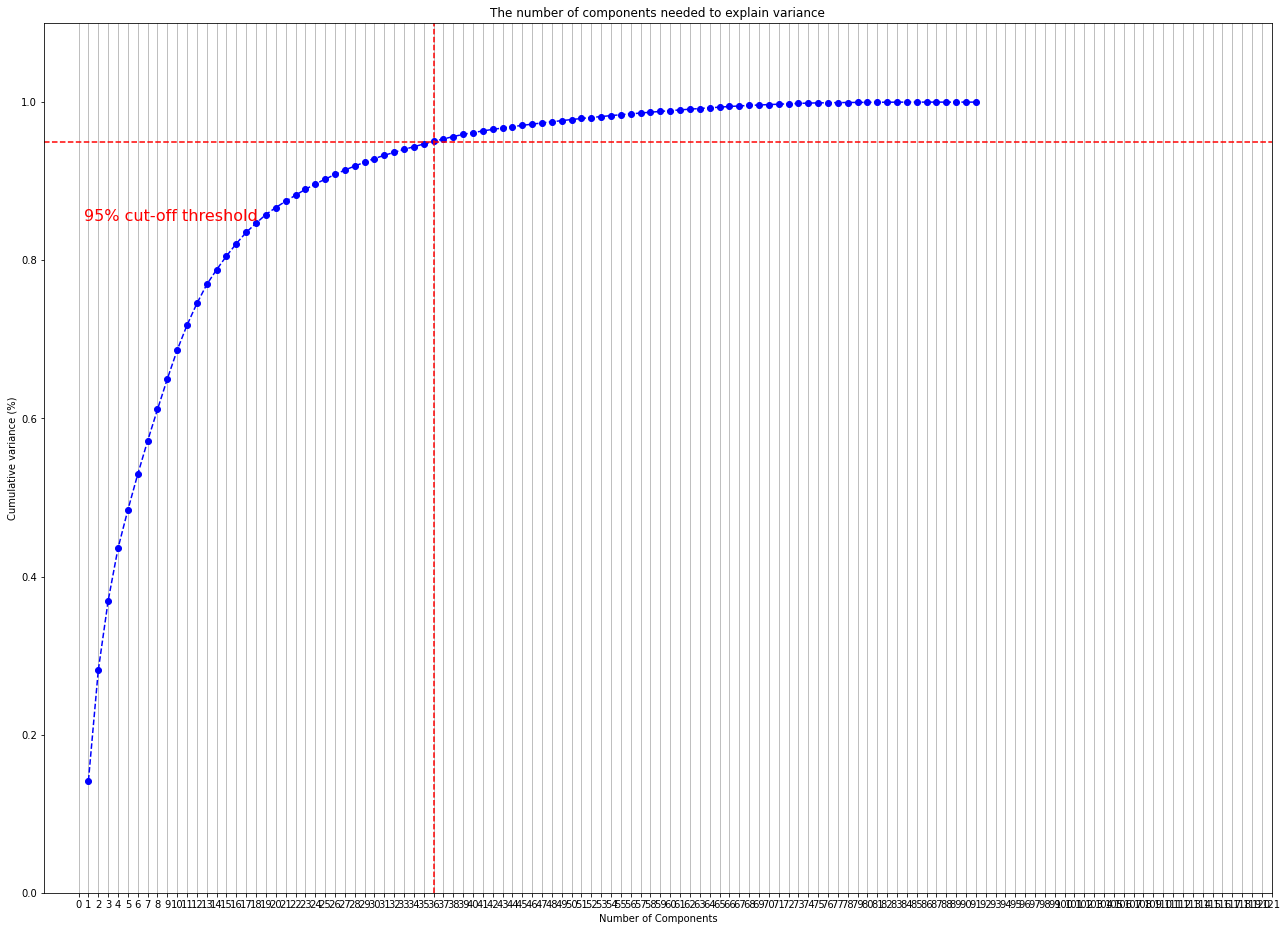

In [ ]:
# plot 95% - number of components 36 
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (22,16)

fig, ax = plt.subplots()
xi = np.arange(1, 92, step=1)
y = np.cumsum(pca_91.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 122, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=36, color='r', linestyle='--')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
# Reduce dimensionality 
# We choose 36 components to get a reduced dataset with 95 % explained variance of the original 

# PCA
pca_36 = PCA(n_components=36)
results_36 = pca_36.fit_transform(clustering_data)
results_36.shape

(1697179, 36)

In [ ]:
# clustering_reduced 

clust_reduced = pd.DataFrame(results_36)

In [ ]:
  clust_reduced.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,1.90,0.18,0.10,-0.07,-0.49,0.73,-0.23,0.10,-0.34,0.06,-0.01,-0.11,0.21,-0.05,0.03,0.01,-0.01,-0.06,-0.01,-0.00,0.03,0.01,-0.01,0.01,-0.03,0.01,-0.03,-0.09,-0.12,-0.00,-0.00,0.00,0.00,0.01,0.05,-0.02
1,1.38,-0.08,0.01,-0.04,-0.53,0.73,-0.26,0.11,-0.36,0.05,0.11,-0.14,0.22,-0.38,-0.03,-0.48,0.36,1.03,0.06,-0.00,0.18,0.10,-0.03,0.02,0.01,-0.00,0.06,0.18,0.23,0.01,0.01,-0.00,-0.02,-0.06,-0.15,0.09
2,1.90,0.19,0.11,-0.07,-0.49,0.73,-0.23,0.10,-0.34,0.06,-0.02,-0.12,-0.35,-0.06,0.02,-0.00,-0.01,-0.06,-0.01,-0.00,0.02,0.01,-0.01,0.01,-0.03,0.01,-0.03,-0.09,-0.12,-0.00,-0.00,0.00,0.00,0.01,0.05,-0.02
3,1.18,1.41,0.09,-0.07,-0.49,0.73,-0.23,0.10,-0.35,0.06,-0.00,-0.12,-0.36,-0.09,0.02,-0.05,0.01,-0.08,-0.01,0.00,-0.07,-0.05,0.01,-0.01,0.04,-0.02,0.05,0.11,0.15,0.00,0.00,0.00,-0.01,-0.01,-0.03,0.02
4,-0.73,0.42,0.68,-0.05,-0.50,0.71,-0.18,-0.10,0.01,-0.09,0.20,-0.16,0.31,0.45,0.65,-0.32,0.04,0.00,0.01,0.01,-0.07,-0.06,0.01,-0.03,0.04,-0.04,0.09,-0.04,-0.07,0.00,-0.00,0.01,0.01,-0.01,0.00,-0.00
5,1.38,-0.09,0.06,-0.02,-0.21,0.74,0.36,-0.85,1.05,-0.32,0.09,-0.06,0.21,-0.18,0.09,0.05,-0.06,-0.33,-0.02,0.00,0.03,0.03,-0.02,0.03,-0.08,0.03,-0.09,-0.19,-0.28,0.00,-0.00,0.00,-0.01,-0.06,-0.12,0.07
6,1.38,-0.09,0.06,-0.02,-0.21,0.74,0.36,-0.84,1.05,-0.32,0.09,-0.06,0.21,-0.17,0.09,0.05,-0.06,-0.33,-0.02,0.00,0.03,0.03,-0.02,0.03,-0.07,0.03,-0.09,-0.19,-0.27,0.00,-0.00,0.00,-0.01,-0.06,-0.12,0.07
7,1.86,0.16,0.10,-0.07,-0.49,0.73,-0.23,0.10,-0.35,0.06,-0.01,-0.12,0.21,-0.07,0.03,-0.02,0.00,-0.07,-0.01,0.00,-0.02,-0.02,0.00,0.00,0.01,-0.01,0.01,0.01,0.01,-0.00,0.00,0.00,-0.00,-0.00,0.01,-0.00
8,1.90,0.18,0.10,-0.07,-0.49,0.73,-0.23,0.10,-0.34,0.06,-0.01,-0.11,0.21,-0.05,0.03,0.01,-0.01,-0.06,-0.01,-0.00,0.03,0.01,-0.01,0.01,-0.03,0.01,-0.03,-0.09,-0.12,-0.00,-0.00,0.00,0.00,0.01,0.05,-0.02
9,1.90,0.18,0.10,-0.07,-0.49,0.73,-0.23,0.10,-0.34,0.06,-0.01,-0.11,0.21,-0.05,0.03,0.01,-0.01,-0.06,-0.01,-0.00,0.03,0.01,-0.01,0.01,-0.03,0.01,-0.03,-0.09,-0.12,-0.00,-0.00,0.00,0.00,0.01,0.05,-0.02


In [ ]:
#Cluster with the reduced variables (36) 

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(clust_reduced)
    sse.append(km.inertia_)

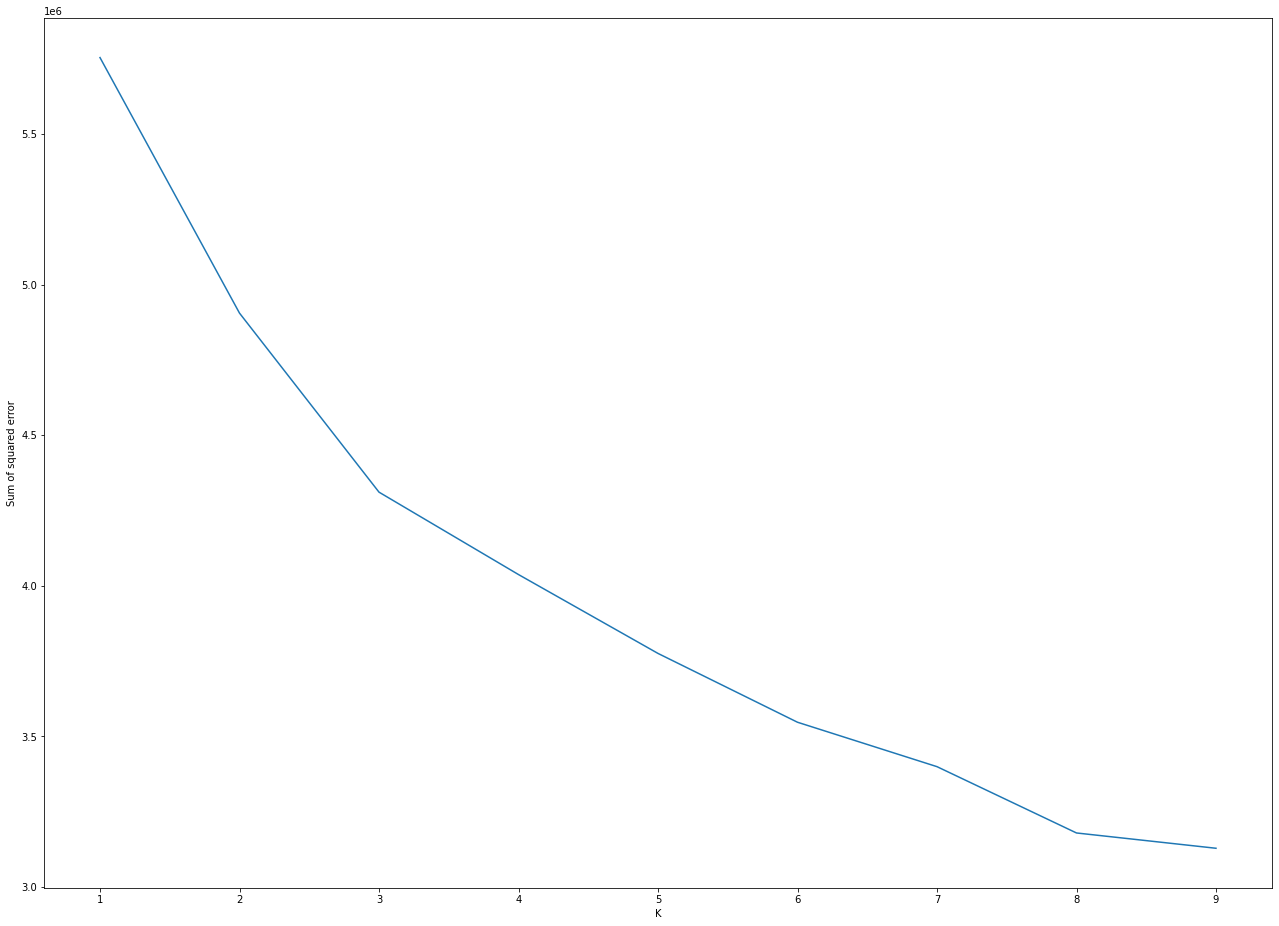

In [ ]:
# Visualize the results

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
#K-MEANS fit - clust_reduced - number of cluster is 3 

kmeans = KMeans(n_clusters=3, random_state=0).fit(clust_reduced)

In [ ]:
#pca - kmeans with 3 clusters 
pca36 = PCA(n_components = 3)
X3a = pca36.fit_transform(clust_reduced)

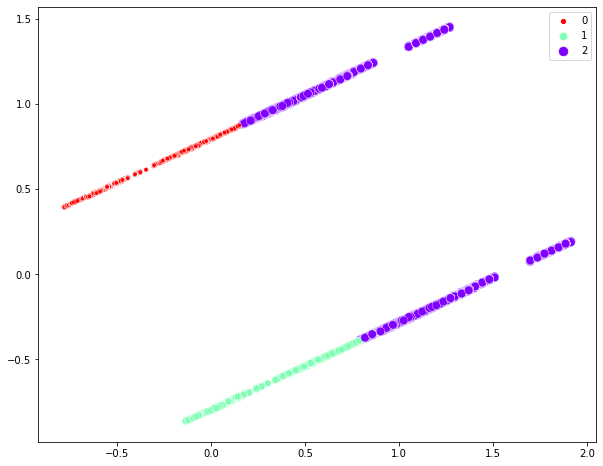

In [ ]:
#Plot - kmeans with 3 clusters # size (different size in order to visual better the clusters )
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X3a[:, 0], y=X3a[:,1], hue=kmeans.labels_ , palette="rainbow_r", size=kmeans.labels_ )

In [ ]:
# Compute cluster centers and predict cluster index for each sample.

clustering_prediction = kmeans.fit_predict(clust_reduced)

In [ ]:
list_pred = clustering_prediction.tolist()

In [ ]:
# create dataset for describe
# append clust_pred into the original dataframe

kmeans_clust_final = clustering_data.copy()

kmeans_clust_final["CLUSTER_ALLOCATION"] = list_pred
kmeans_clust_final.tail()

,USER_SEX_F,USER_SEX_M,ASSET_TYPE_CATCHUP TV,ASSET_TYPE_LIVE TV,ASSET_TYPE_TSTV,ASSET_TYPE_VOD,ASSET_CATEGORY_CHRISTMAS TIME,ASSET_CATEGORY_DOCUMENTARIES,ASSET_CATEGORY_KIDS,"ASSET_CATEGORY_KIDS,MOVIES",ASSET_CATEGORY_MOVIES,ASSET_CATEGORY_Not Available,ASSET_CATEGORY_SERIES,ASSET_CATEGORY_SHOWS,ASSET_CATEGORY_SPORTS,SRC_GENRE_DESC_ACTION,"SRC_GENRE_DESC_ACTION,ADVENTURE","SRC_GENRE_DESC_ACTION,COMEDY","SRC_GENRE_DESC_ACTION,CRIME","SRC_GENRE_DESC_ACTION,FANTASY","SRC_GENRE_DESC_ACTION,MYSTERY","SRC_GENRE_DESC_ACTION,ROMANTIC COMEDY","SRC_GENRE_DESC_ACTION,SCIFI","SRC_GENRE_DESC_ACTION,THRILLER","SRC_GENRE_DESC_ACTION,WAR",SRC_GENRE_DESC_ADVENTURE,"SRC_GENRE_DESC_ADVENTURE,COMEDY","SRC_GENRE_DESC_ADVENTURE,FAMILY","SRC_GENRE_DESC_ADVENTURE,FANTASY","SRC_GENRE_DESC_ADVENTURE,MYSTERY","SRC_GENRE_DESC_ADVENTURE,SCIFI","SRC_GENRE_DESC_ADVENTURE,THRILLER",SRC_GENRE_DESC_ANIMATION,"SRC_GENRE_DESC_ANIMATION,KIDS",SRC_GENRE_DESC_COMEDY,SRC_GENRE_DESC_COMEDY DRAMA,"SRC_GENRE_DESC_COMEDY,CRIME","SRC_GENRE_DESC_COMEDY,FAMILY","SRC_GENRE_DESC_COMEDY,FANTASY",SRC_GENRE_DESC_COOKING,...,SRC_GENRE_DESC_HORROR,"SRC_GENRE_DESC_HORROR,MYSTERY","SRC_GENRE_DESC_HORROR,TRUE STORY",SRC_GENRE_DESC_KIDS,"SRC_GENRE_DESC_KIDS,LIVE ACTION",SRC_GENRE_DESC_LIVE ACTION,SRC_GENRE_DESC_MEDICAL DRAMA,SRC_GENRE_DESC_MUSICAL,SRC_GENRE_DESC_MYSTERY,"SRC_GENRE_DESC_MYSTERY,ROMANCE","SRC_GENRE_DESC_MYSTERY,SCIFI","SRC_GENRE_DESC_MYSTERY,THRILLER",SRC_GENRE_DESC_REALITY SHOW,SRC_GENRE_DESC_ROMANCE,SRC_GENRE_DESC_ROMANTIC COMEDY,SRC_GENRE_DESC_SCIFI,"SRC_GENRE_DESC_SCIFI,THRILLER",SRC_GENRE_DESC_SHOW,SRC_GENRE_DESC_SOCIAL,"SRC_GENRE_DESC_SOCIAL,SPORT",SRC_GENRE_DESC_SPORT,SRC_GENRE_DESC_SPORTS-LIVE,SRC_GENRE_DESC_TALENT SHOW,SRC_GENRE_DESC_THRILLER,SRC_GENRE_DESC_TRUE STORY,SRC_GENRE_DESC_UNKNOWN,SRC_GENRE_DESC_WAR,SRC_GENRE_DESC_WESTERN,VIEW_DAY_Friday,VIEW_DAY_Monday,VIEW_DAY_Saturday,VIEW_DAY_Sunday,VIEW_DAY_Thursday,VIEW_DAY_Tuesday,VIEW_DAY_Wednesday,"('USER_AGE',)","('PRG_DURATION_MIN',)","('VIEW_DURATION_MIN',)","('VIEW_RATING',)",CLUSTER_ALLOCATION
1697174,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.79,0.06,0.06,0.60,0
1697175,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.87,0.02,0.02,0.60,0
1697176,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.05,0.00,0.00,0.60,1
1697177,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.08,0.14,0.14,0.60,1
1697178,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.87,0.02,0.02,0.60,1


In [ ]:
print(kmeans_clust_final["CLUSTER_ALLOCATION"].unique())

[2 0 1]


In [ ]:
kmeans_clust_final["CLUSTER_ALLOCATION"].value_counts()

0    692877
1    688634
2    315668
Name: CLUSTER_ALLOCATION, dtype: int64

CLUSTER ANALYSIS 

In [ ]:
print(data_cleaning.shape)
print(kmeans_clust_final.shape)

(1697179, 15)
(1697179, 92)


In [ ]:
#Add this part to DATA_ANALYSIS or add the column VIEW_PERCENTAGE at the beginning of this code
#Add new column with view percentage

data_cleaning["VIEW_PERCENTAGE"] = round((data_cleaning["VIEW_DURATION_MIN"] / data_cleaning["PRG_DURATION_MIN"]), 2)

data_cleaning.head(5)

,USER_KEY,USER_NAME,USER_AGE,USER_SEX,VIEW_DATE,ASSET_TYPE,ASSET_CATEGORY,SRC_GENRE_DESC,CHANNEL,ASSET_NAME,PRG_DURATION_MIN,VIEW_DURATION_MIN,VIEWERSHIP_KEY,ASSET_KEY,VIEW_RATING,VIEW_PERCENTAGE
0,489647,A98815,73,F,10/12/18 00:00:00,LIVE TV,SPORTS,SPORTS-LIVE,ΕΡΤ1,Super League SOUROTI 2018/19 (L)(PANAITOLIKOS ...,115.00,17.50,8769,6548,1,0.15
1,489647,A98815,73,F,10/12/18 00:00:00,TSTV,SPORTS,SPORTS-LIVE,"Eurosport 1 (International, GREEK)",Sports show (ALL SPORTS: WATTS ),15.00,12.83,8770,7633,4,0.86
2,490873,babil,30,F,10/12/18 00:00:00,LIVE TV,SPORTS,SPORTS-LIVE,novasports1 HD,Greek Football Championship 2018/19 (L)(PANION...,130.00,23.27,8771,7634,1,0.18
3,488305,9anti1,29,M,10/12/18 00:00:00,LIVE TV,SPORTS,SPORTS-LIVE,novasports1 HD,Greek Football Championship 2018/19 (L)(PANION...,130.00,73.95,8772,7634,3,0.57
4,488844,askiriazis,81,M,10/12/18 00:00:00,VOD,MOVIES,COMEDY,UNKNOWN,HALL PASS,72.89,56.07,8773,1,4,0.77


In [ ]:
# Convert 'VIEW_PERCENTAGE' column to float 

data_cleaning['VIEW_PERCENTAGE'] = data_cleaning['VIEW_PERCENTAGE'].astype(float)


In [ ]:
data_cleaning["VIEW_PERCENTAGE"].describe()

count   1697179.00
mean          0.69
std           0.22
min           0.00
25%           0.77
50%           0.77
75%           0.77
max           1.21
Name: VIEW_PERCENTAGE, dtype: float64

In [ ]:
#Add clustering prediction after PCA to the initial df
data_cleaning["CLUSTER_ALLOCATION"] = kmeans_clust_final["CLUSTER_ALLOCATION"]

In [ ]:
data_cleaning["CLUSTER_ALLOCATION"].unique()

array([2, 0, 1])

In [ ]:
### CLUSTER 1 REDUCED - FROM kmeans_clust_final ( clustering with reduced columns - pca )


cluster_1 = data_cleaning[data_cleaning["CLUSTER_ALLOCATION"] == 0]
print("cluster_1:", cluster_1.shape)


# GROUP BY - "USER_KEY"
cluster1_grouped = cluster_1.groupby("USER_KEY").agg({"USER_SEX":lambda x: set(x).pop(),
                                                          "USER_AGE":lambda x: set(x).pop(),
                                                          "SRC_GENRE_DESC":lambda x: list(x),
                                                          "VIEW_RATING":lambda x: list(x),
                                                          "VIEW_PERCENTAGE":lambda x: list(x)})

# creation of  SRC_GENRE_DESC_MODE - find most common SRC_GENRE_DESC viewed by USER_KEY

from collections import Counter

cluster1_grouped["SRC_GENRE_DESC_MODE"]= cluster1_grouped["SRC_GENRE_DESC"]

for i in cluster1_grouped.index:
  c1 = Counter(cluster1_grouped["SRC_GENRE_DESC"][i])
  cluster1_grouped["SRC_GENRE_DESC_MODE"][i] = c1.most_common(1)


# final version of SRC_GENRE_DESC_MODE and SRC_GENRE_DESC_MODE_FREQ

cluster1_grouped["SRC_GENRE_DESC_MODE_FREQ"] = 0

for i in cluster1_grouped.index:
  cluster1_grouped["SRC_GENRE_DESC_MODE_FREQ"][i] = cluster1_grouped["SRC_GENRE_DESC_MODE"][i][0][1]
  
  
for i in cluster1_grouped.index:
  cluster1_grouped["SRC_GENRE_DESC_MODE"][i] = cluster1_grouped["SRC_GENRE_DESC_MODE"][i][0][0]
  
# AVERAGE - VIEW_RATING 

cluster1_grouped["VIEW_RATING_AVG"] = 0

for i in cluster1_grouped.index:
  cluster1_grouped["VIEW_RATING_AVG"][i] = np.mean(cluster1_grouped["VIEW_RATING"][i]) 

# MEDIAN - VIEW_RATING 

cluster1_grouped["VIEW_RATING_MEDIAN"] = 0

for i in cluster1_grouped.index:
  cluster1_grouped["VIEW_RATING_MEDIAN"][i] = np.median(cluster1_grouped["VIEW_RATING"][i]) 


# AVERAGE - VIEW_PERCENTAGE 

cluster1_grouped["VIEW_PERCENTAGE_AVG"] = 0

for i in cluster1_grouped.index:
  cluster1_grouped["VIEW_PERCENTAGE_AVG"][i] = np.mean(cluster1_grouped["VIEW_PERCENTAGE"][i]) 
  
# MEDIAN - VIEW_PERCENTAGE 

cluster1_grouped["VIEW_PERCENTAGE_MEDIAN"] = 0

for i in cluster1_grouped.index:
  cluster1_grouped["VIEW_PERCENTAGE_MEDIAN"][i] = np.median(cluster1_grouped["VIEW_PERCENTAGE"][i]) 


cluster_1: (692877, 17)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to b

In [ ]:
cluster1_grouped.describe()  


,USER_AGE,SRC_GENRE_DESC_MODE_FREQ,VIEW_RATING_AVG,VIEW_RATING_MEDIAN,VIEW_PERCENTAGE_AVG,VIEW_PERCENTAGE_MEDIAN
count,42060.00,42060.00,42060.00,42060.00,42060.00,42060.00
mean,57.03,6.53,3.88,3.93,0.00,0.01
std,22.26,10.37,0.48,0.45,0.04,0.07
min,19.00,1.00,1.00,1.00,0.00,0.00
25%,38.00,1.00,4.00,4.00,0.00,0.00
50%,57.00,3.00,4.00,4.00,0.00,0.00
75%,76.00,7.00,4.00,4.00,0.00,0.00
max,95.00,277.00,5.00,5.00,1.00,1.00


In [ ]:
cluster1_grouped["USER_SEX"].value_counts()


M    42060
Name: USER_SEX, dtype: int64

In [ ]:
  
cluster1_grouped["USER_AGE"].describe()


count   42060.00
mean       57.03
std        22.26
min        19.00
25%        38.00
50%        57.00
75%        76.00
max        95.00
Name: USER_AGE, dtype: float64

In [ ]:
cluster1_grouped["SRC_GENRE_DESC_MODE"].value_counts()


KIDS                  8598
COMEDY                3974
ACTION,THRILLER       3097
DRAMA                 2980
UNKNOWN               2623
                      ... 
ADVENTURE,THRILLER      16
FANTASY,ROMANCE         16
CRIME,FANTASY           10
MYSTERY,ROMANCE          8
SPORT                    2
Name: SRC_GENRE_DESC_MODE, Length: 65, dtype: int64

In [ ]:
### CLUSTER 2 REDUCED - FROM kmeans_clust_final ( clustering with reduced columns - pca )


cluster_2 = data_cleaning[data_cleaning["CLUSTER_ALLOCATION"] == 1]
print("cluster_2:", cluster_2.shape)


# GROUP BY - "USER_KEY"
cluster2_grouped = cluster_2.groupby("USER_KEY").agg({"USER_SEX":lambda x: set(x).pop(),
                                                          "USER_AGE":lambda x: set(x).pop(),
                                                          "SRC_GENRE_DESC":lambda x: list(x),
                                                          "VIEW_RATING":lambda x: list(x),
                                                          "VIEW_PERCENTAGE":lambda x: list(x)})

# creation of  SRC_GENRE_DESC_MODE - find most common SRC_GENRE_DESC viewed by USER_KEY

from collections import Counter

cluster2_grouped["SRC_GENRE_DESC_MODE"]= cluster2_grouped["SRC_GENRE_DESC"]

for i in cluster2_grouped.index:
  c2 = Counter(cluster2_grouped["SRC_GENRE_DESC"][i])
  cluster2_grouped["SRC_GENRE_DESC_MODE"][i] = c2.most_common(1)


# final version of SRC_GENRE_DESC_MODE and SRC_GENRE_DESC_MODE_FREQ

cluster2_grouped["SRC_GENRE_DESC_MODE_FREQ"] = 0

for i in cluster2_grouped.index:
  cluster2_grouped["SRC_GENRE_DESC_MODE_FREQ"][i] = cluster2_grouped["SRC_GENRE_DESC_MODE"][i][0][1]
  
  
for i in cluster2_grouped.index:
  cluster2_grouped["SRC_GENRE_DESC_MODE"][i] = cluster2_grouped["SRC_GENRE_DESC_MODE"][i][0][0]
  
# AVERAGE - VIEW_RATING 

cluster2_grouped["VIEW_RATING_AVG"] = 0

for i in cluster2_grouped.index:
  cluster2_grouped["VIEW_RATING_AVG"][i] = np.mean(cluster2_grouped["VIEW_RATING"][i]) 

# MEDIAN - VIEW_RATING 

cluster2_grouped["VIEW_RATING_MEDIAN"] = 0

for i in cluster2_grouped.index:
  cluster2_grouped["VIEW_RATING_MEDIAN"][i] = np.median(cluster2_grouped["VIEW_RATING"][i]) 


# AVERAGE - VIEW_PERCENTAGE 

cluster2_grouped["VIEW_PERCENTAGE_AVG"] = 0

for i in cluster2_grouped.index:
  cluster2_grouped["VIEW_PERCENTAGE_AVG"][i] = np.mean(cluster2_grouped["VIEW_PERCENTAGE"][i]) 
  
# MEDIAN - VIEW_PERCENTAGE 

cluster2_grouped["VIEW_PERCENTAGE_MEDIAN"] = 0

for i in cluster2_grouped.index:
  cluster2_grouped["VIEW_PERCENTAGE_MEDIAN"][i] = np.median(cluster2_grouped["VIEW_PERCENTAGE"][i]) 



cluster_2: (688634, 17)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to b

In [ ]:
cluster2_grouped.describe()

,USER_AGE,SRC_GENRE_DESC_MODE_FREQ,VIEW_RATING_AVG,VIEW_RATING_MEDIAN,VIEW_PERCENTAGE_AVG,VIEW_PERCENTAGE_MEDIAN
count,42063.00,42063.00,42063.00,42063.00,42063.00,42063.00
mean,57.17,6.53,3.89,3.93,0.00,0.00
std,22.25,10.73,0.46,0.43,0.04,0.07
min,19.00,1.00,1.00,1.00,0.00,0.00
25%,38.00,1.00,4.00,4.00,0.00,0.00
50%,57.00,3.00,4.00,4.00,0.00,0.00
75%,76.00,7.00,4.00,4.00,0.00,0.00
max,95.00,327.00,5.00,5.00,1.00,1.00


In [ ]:
cluster2_grouped["USER_SEX"].value_counts()

F    42063
Name: USER_SEX, dtype: int64

In [ ]:
cluster2_grouped["USER_AGE"].describe()

count   42063.00
mean       57.17
std        22.25
min        19.00
25%        38.00
50%        57.00
75%        76.00
max        95.00
Name: USER_AGE, dtype: float64

In [ ]:
cluster2_grouped["SRC_GENRE_DESC_MODE"].value_counts()

KIDS                  8472
COMEDY                3911
ACTION,THRILLER       3060
DRAMA                 2994
UNKNOWN               2506
                      ... 
ADVENTURE,THRILLER      15
FANTASY,ROMANCE         15
CRIME,FANTASY           11
MYSTERY,ROMANCE         10
SPORT                    4
Name: SRC_GENRE_DESC_MODE, Length: 65, dtype: int64

In [ ]:
### CLUSTER 3 REDUCED - FROM kmeans_clust_final ( clustering with reduced columns - pca )


cluster_3 = data_cleaning[data_cleaning["CLUSTER_ALLOCATION"] == 2]
print("cluster_3:", cluster_3.shape)


# GROUP BY - "USER_KEY"
cluster3_grouped = cluster_3.groupby("USER_KEY").agg({"USER_SEX":lambda x: set(x).pop(),
                                                          "USER_AGE":lambda x: set(x).pop(),
                                                          "SRC_GENRE_DESC":lambda x: list(x),
                                                          "VIEW_RATING":lambda x: list(x),
                                                          "VIEW_PERCENTAGE":lambda x: list(x)})

# creation of  SRC_GENRE_DESC_MODE - find most common SRC_GENRE_DESC viewed by USER_KEY

from collections import Counter

cluster3_grouped["SRC_GENRE_DESC_MODE"]= cluster3_grouped["SRC_GENRE_DESC"]

for i in cluster3_grouped.index:
  c3 = Counter(cluster3_grouped["SRC_GENRE_DESC"][i])
  cluster3_grouped["SRC_GENRE_DESC_MODE"][i] = c3.most_common(1)


# final version of SRC_GENRE_DESC_MODE and SRC_GENRE_DESC_MODE_FREQ

cluster3_grouped["SRC_GENRE_DESC_MODE_FREQ"] = 0

for i in cluster3_grouped.index:
  cluster3_grouped["SRC_GENRE_DESC_MODE_FREQ"][i] = cluster3_grouped["SRC_GENRE_DESC_MODE"][i][0][1]
  
  
for i in cluster3_grouped.index:
  cluster3_grouped["SRC_GENRE_DESC_MODE"][i] = cluster3_grouped["SRC_GENRE_DESC_MODE"][i][0][0]
  
# AVERAGE - VIEW_RATING 

cluster3_grouped["VIEW_RATING_AVG"] = 0

for i in cluster3_grouped.index:
  cluster3_grouped["VIEW_RATING_AVG"][i] = np.mean(cluster3_grouped["VIEW_RATING"][i]) 

# MEDIAN - VIEW_RATING 

cluster3_grouped["VIEW_RATING_MEDIAN"] = 0

for i in cluster3_grouped.index:
  cluster3_grouped["VIEW_RATING_MEDIAN"][i] = np.median(cluster3_grouped["VIEW_RATING"][i]) 


# AVERAGE - VIEW_PERCENTAGE 

cluster3_grouped["VIEW_PERCENTAGE_AVG"] = 0

for i in cluster3_grouped.index:
  cluster3_grouped["VIEW_PERCENTAGE_AVG"][i] = np.mean(cluster3_grouped["VIEW_PERCENTAGE"][i]) 
  
# MEDIAN - VIEW_PERCENTAGE 

cluster3_grouped["VIEW_PERCENTAGE_MEDIAN"] = 0

for i in cluster3_grouped.index:
  cluster3_grouped["VIEW_PERCENTAGE_MEDIAN"][i] = np.median(cluster3_grouped["VIEW_PERCENTAGE"][i]) 


cluster_3: (315668, 17)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to b

In [ ]:
cluster3_grouped.describe()

,USER_AGE,SRC_GENRE_DESC_MODE_FREQ,VIEW_RATING_AVG,VIEW_RATING_MEDIAN,VIEW_PERCENTAGE_AVG,VIEW_PERCENTAGE_MEDIAN
count,33857.00,33857.00,33857.00,33857.00,33857.00,33857.00
mean,56.98,6.90,1.61,1.59,0.00,0.01
std,22.19,15.06,0.84,0.97,0.03,0.08
min,19.00,1.00,1.00,1.00,0.00,0.00
25%,38.00,1.00,1.00,1.00,0.00,0.00
50%,57.00,3.00,1.00,1.00,0.00,0.00
75%,76.00,7.00,2.00,2.00,0.00,0.00
max,95.00,1653.00,5.00,5.00,1.00,1.00


In [ ]:
cluster3_grouped["USER_SEX"].value_counts()

F    16995
M    16862
Name: USER_SEX, dtype: int64

In [ ]:
cluster3_grouped["USER_AGE"].describe()

count   33857.00
mean       56.98
std        22.19
min        19.00
25%        38.00
50%        57.00
75%        76.00
max        95.00
Name: USER_AGE, dtype: float64

In [ ]:
cluster3_grouped["SRC_GENRE_DESC_MODE"].value_counts()

SPORTS-LIVE    23817
UNKNOWN         5202
SHOW            1499
KIDS            1215
DRAMA            505
COMEDY           489
ACTION           391
ADVENTURE        347
CRIME            187
ROMANCE          120
SCIFI             85
Name: SRC_GENRE_DESC_MODE, dtype: int64